In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank_data.csv')
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [4]:
# Describe Numerical Variables
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [5]:
df['id'] = df['id'].astype('O') 

In [6]:
# Describe Categorical Variables
df.describe(include= 'O')

,id,recovery_strategy,sex
count,1882,1882,1882
unique,1882,5,2
top,2030,Level 1 Recovery,Male
freq,1,670,973


In [7]:
# Check Null Values
df.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [8]:
# Check Duplicated 
df.duplicated().sum()

0

# EDA

In [9]:
cat_cols = df.select_dtypes(include='O').columns.to_list()
cat_cols.remove('id')
cat_cols

['recovery_strategy', 'sex']

In [10]:
for col in cat_cols:
    print(df[col].value_counts())
    print('='*30)

Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: recovery_strategy, dtype: int64
Male      973
Female    909
Name: sex, dtype: int64


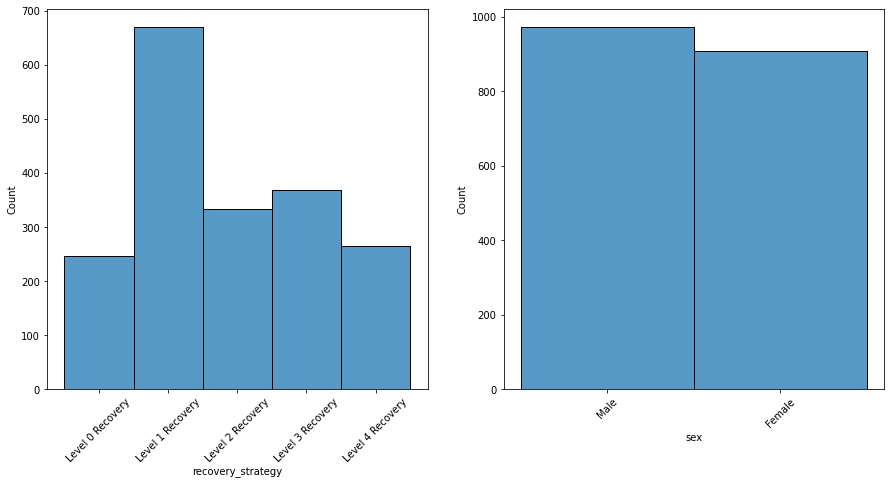

In [11]:
plt.figure(figsize=(15,7))
for i,col in enumerate(cat_cols,1):
    plt.subplot(1,2,i)
    sns.histplot(data=df, x=col)
    plt.xticks(rotation = 45)

In [12]:
num_cols = df.select_dtypes(exclude='O').columns.tolist()
num_cols

['expected_recovery_amount', 'actual_recovery_amount', 'age']

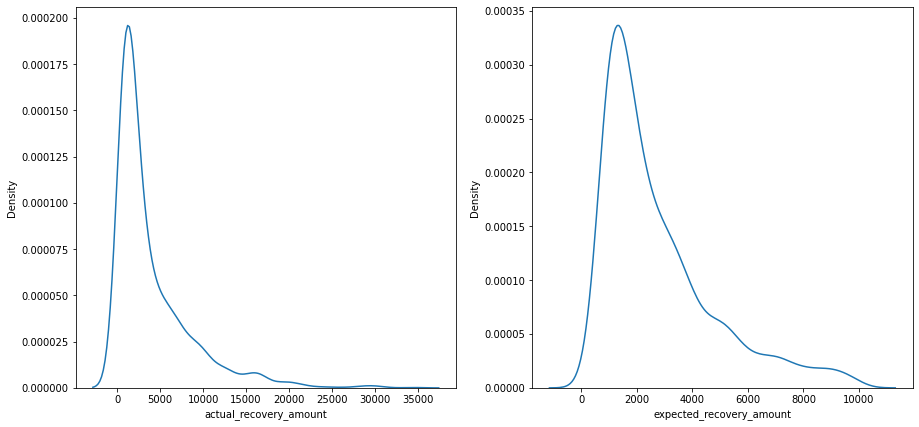

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.kdeplot(df['actual_recovery_amount'])

plt.subplot(1,2,2)
sns.kdeplot(df['expected_recovery_amount'])
plt.show()


## Bivariate

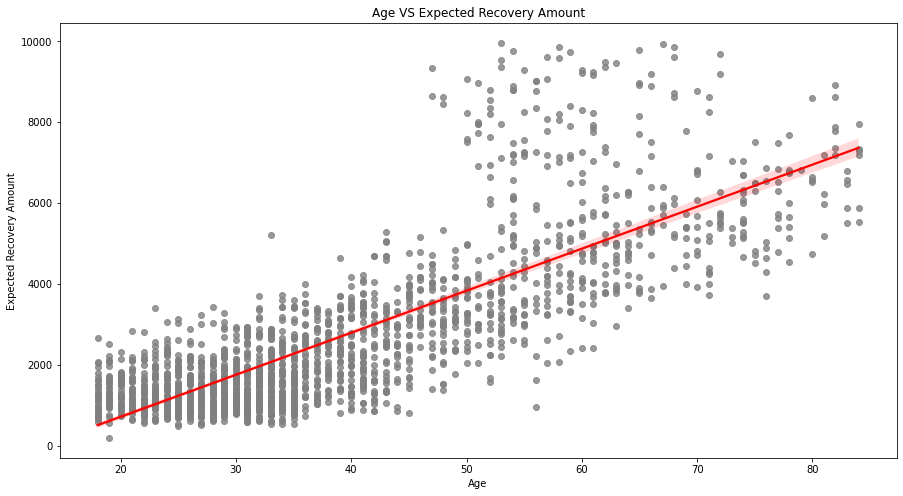

In [14]:
plt.figure(figsize=(15,8))
sns.regplot(data=df,x = 'age' , y = 'expected_recovery_amount',scatter_kws={'color' :'grey'},line_kws={'color' :'red'})
plt.title('Age VS Expected Recovery Amount')
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.show()

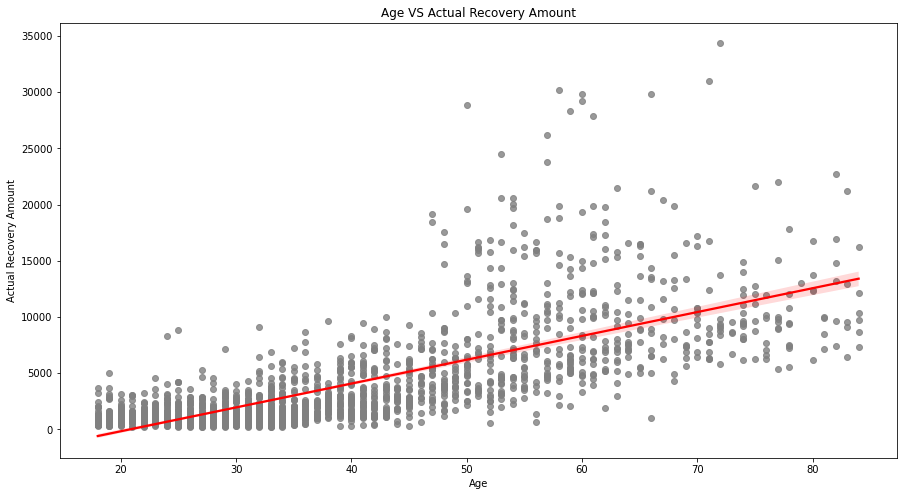

In [15]:
plt.figure(figsize=(15,8))
sns.regplot(data=df,x = 'age' , y = 'actual_recovery_amount',scatter_kws={'color' :'grey'},line_kws={'color' :'red'})
plt.title('Age VS Actual Recovery Amount')
plt.xlabel('Age')
plt.ylabel('Actual Recovery Amount')
plt.show()

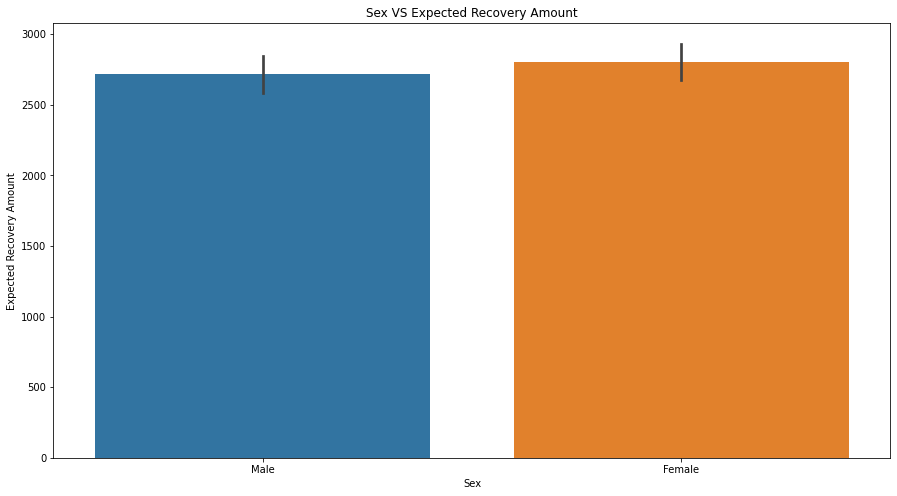

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x = 'sex' , y = 'expected_recovery_amount')
plt.title('Sex VS Expected Recovery Amount')
plt.xlabel('Sex')
plt.ylabel('Expected Recovery Amount')
plt.show()

___________________________________________________________________________________

## Graphical exploratory data analysis

In [24]:
df[(df['expected_recovery_amount'] > 0) & (df['expected_recovery_amount'] <= 1000)]

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
242,618,993,790.480,Level 0 Recovery,22,Male
243,1779,993,518.300,Level 0 Recovery,36,Female
244,1963,996,1225.660,Level 0 Recovery,29,Female
245,391,998,763.270,Level 0 Recovery,26,Female


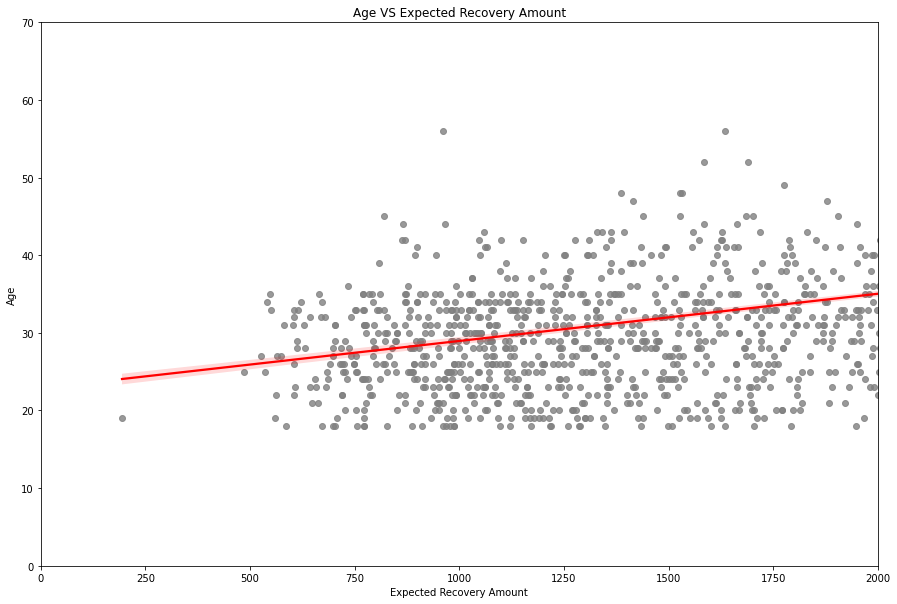

In [35]:
plt.figure(figsize=(15,10))
sns.regplot(data=df,x = 'expected_recovery_amount' , y = 'age',scatter_kws={'color' :'grey'},line_kws={'color' :'red'})
plt.title('Age VS Expected Recovery Amount')
plt.ylabel('Age')
plt.xlabel('Expected Recovery Amount')
plt.xlim(0,2000)
plt.ylim(0,70)
plt.show()

## Statistical test: sex vs. expected recovery amount

In [66]:
x = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
x.groupby(['recovery_strategy','sex'])['sex'].count().to_frame()

sex
recovery_strategy sex        
Level 0 Recovery  Female   32
                  Male     57
Level 1 Recovery  Female   40
                  Male     55

## Statistical test: age vs. expected recovery amount

In [60]:
x.groupby(['recovery_strategy'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
recovery_strategy,,,,,,,,
Level 0 Recovery,89.0,27.224719,6.399135,18.0,23.0,26.0,31.0,56.0
Level 1 Recovery,95.0,28.684211,5.869617,18.0,24.0,29.0,33.0,43.0


## Exploratory graphical analysis: recovery amount

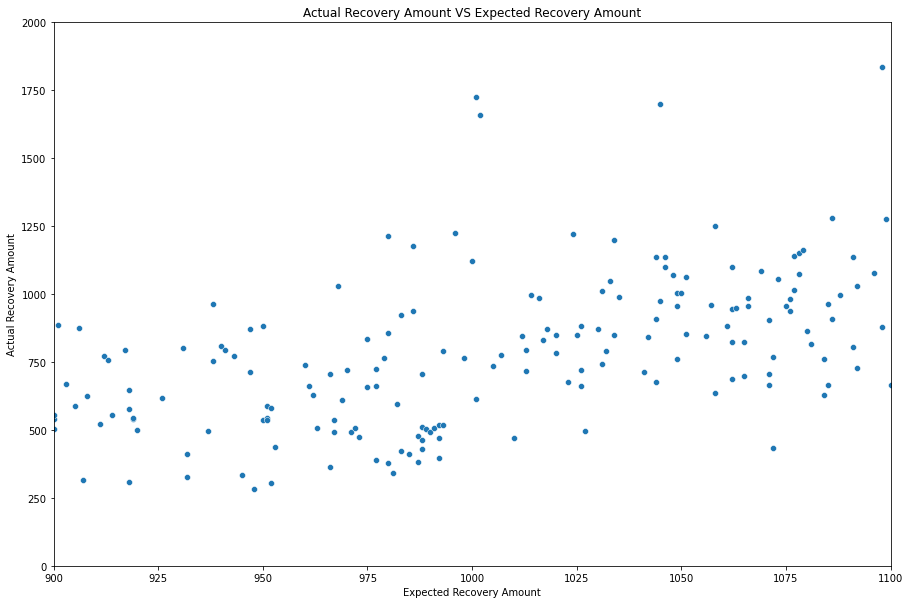

In [74]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x = 'expected_recovery_amount' , y = 'actual_recovery_amount')
plt.title('Actual Recovery Amount VS Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.xlim(900,1100)
plt.ylim(0,2000)
plt.show()

## Regression modeling: no threshold

In [226]:
# Data Spliting 
from sklearn.model_selection import train_test_split

df_new = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] < 1100)]
x = df_new[['expected_recovery_amount']]
y = df_new['actual_recovery_amount']

x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size = 0.1,random_state=40)


# Model Evaluation
for i in {4,5,6,7}:
    score  = cross_val_score(LinearRegression(),x_train,y_train,cv = i)
    print(f'AVG Score of cv = ({i}):',score.mean().round(5) * 100 ,'%')
    print('-'*30)


AVG Score of cv = (4): 24.382 %
------------------------------
AVG Score of cv = (5): 22.087 %
------------------------------
AVG Score of cv = (6): 25.299 %
------------------------------
AVG Score of cv = (7): 20.599999999999998 %
------------------------------


## Regression modeling: adding true threshold

In [229]:
# New Feature
df_new['Threshold'] = np.where(df_new['expected_recovery_amount']<1000, 0, 1)


# Data Spliting
x = df_new[['expected_recovery_amount','Threshold']]
y = df_new['actual_recovery_amount']
x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size = 0.1,random_state=40)

# Model Evaluation
for i in {4,5,6,7}:
    score2  = cross_val_score(LinearRegression(),x_train,y_train,cv = i)
    print(f'AVG Score of cv = ({i}):',score2.mean().round(5) * 100 ,'%')
    print('-'*30)

AVG Score of cv = (4): 25.268 %
------------------------------
AVG Score of cv = (5): 25.625999999999998 %
------------------------------
AVG Score of cv = (6): 28.355999999999998 %
------------------------------
AVG Score of cv = (7): 21.471999999999998 %
------------------------------


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Regression modeling: adjusting the window

In [232]:
# Data Spliting 
from sklearn.model_selection import train_test_split

df_new2 = df_new[(df_new['expected_recovery_amount'] >= 950) & (df_new['expected_recovery_amount'] < 1050)]
x = df_new2[['expected_recovery_amount','Threshold']]
y = df_new2['actual_recovery_amount']

x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size = 0.05,random_state=40)


# Model Evaluation
for i in {4,5,6,7}:
    score  = cross_val_score(LinearRegression(),x_train,y_train,cv = i)
    print(f'AVG Score of cv = ({i}):',score.mean().round(5) * 100 ,'%')
    print('-'*30)


AVG Score of cv = (4): 22.633 %
------------------------------
AVG Score of cv = (5): 18.106 %
------------------------------
AVG Score of cv = (6): 21.905 %
------------------------------
AVG Score of cv = (7): 17.126 %
------------------------------
